In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
df = pd.read_csv('./data/musicdata_cleaned.csv')
# Fix Length column to expected timedelta format
df['Length'] = '0:' + df['Length'].astype(str)
df['Length'] = pd.to_timedelta(df['Length'], errors='coerce').dt.total_seconds()

df['Length'] = pd.to_timedelta(df['Length']).dt.total_seconds()
df['Release'] = pd.to_datetime(df['Release'], errors='coerce')
df.dropna(subset=['Release'], inplace=True)


## Feature Importance for Predicting Popularity

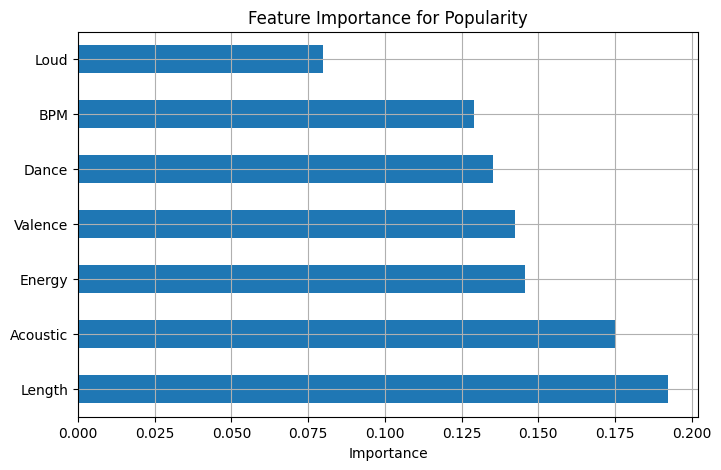

In [ ]:
X = df[['BPM', 'Energy', 'Dance', 'Loud', 'Valence', 'Length', 'Acoustic']]
y = df['Pop.']
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.plot(kind='barh', title='Feature Importance for Popularity', figsize=(8,5))
plt.xlabel('Importance')
plt.grid(True)
plt.show()

## AverageValance Over Time

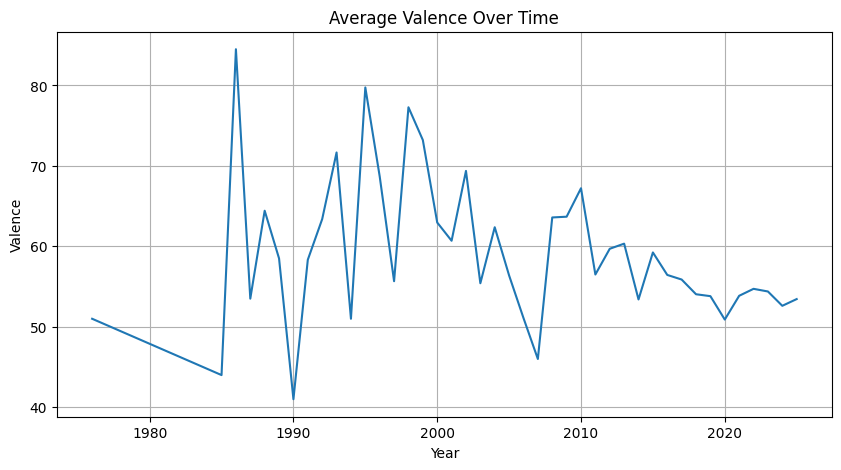

In [4]:
df['Year'] = df['Release'].dt.year
df['Valence_bin'] = pd.cut(df['Valence'], bins=[0, 25, 50, 75, 100], labels=['Low', 'Med-Low', 'Med-High', 'High'])
mood_year = df.groupby('Year')['Valence'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=mood_year, x='Year', y='Valence')
plt.title('Average Valence Over Time')
plt.grid(True)
plt.show()